# Domácí úkol


# Sparse matice (sousednosti)
Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). 

Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
- hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
- mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

**Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:**
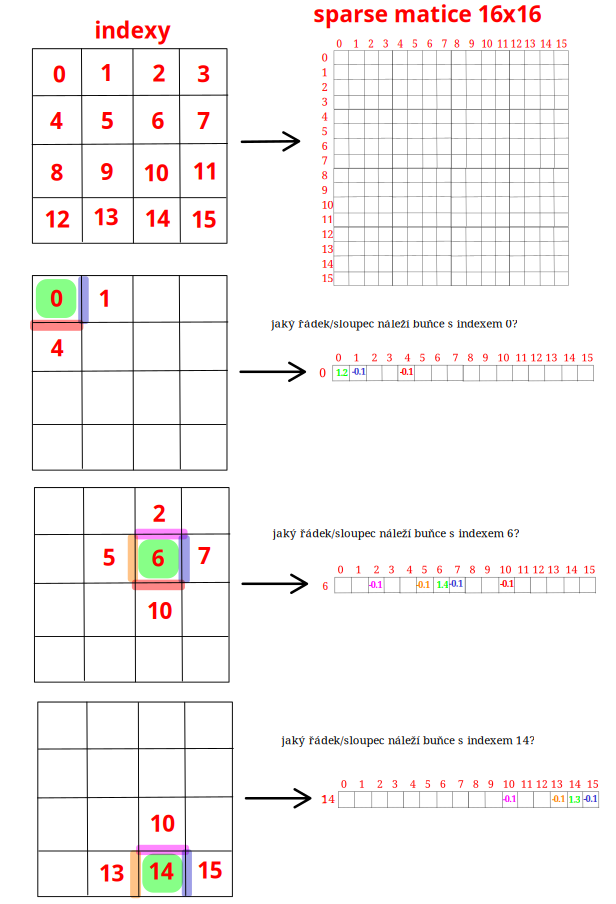

Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```

## Úkol 1.
**Sestavte matici pomocí formátu `LIL` a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě.** 
 - vypište a vykreslete jako obrázek pro $n=3$ a $\varepsilon = 0.1$.
 - vykreslete jako obrázek pro $n=100$ a $\varepsilon = 0.2$. 

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


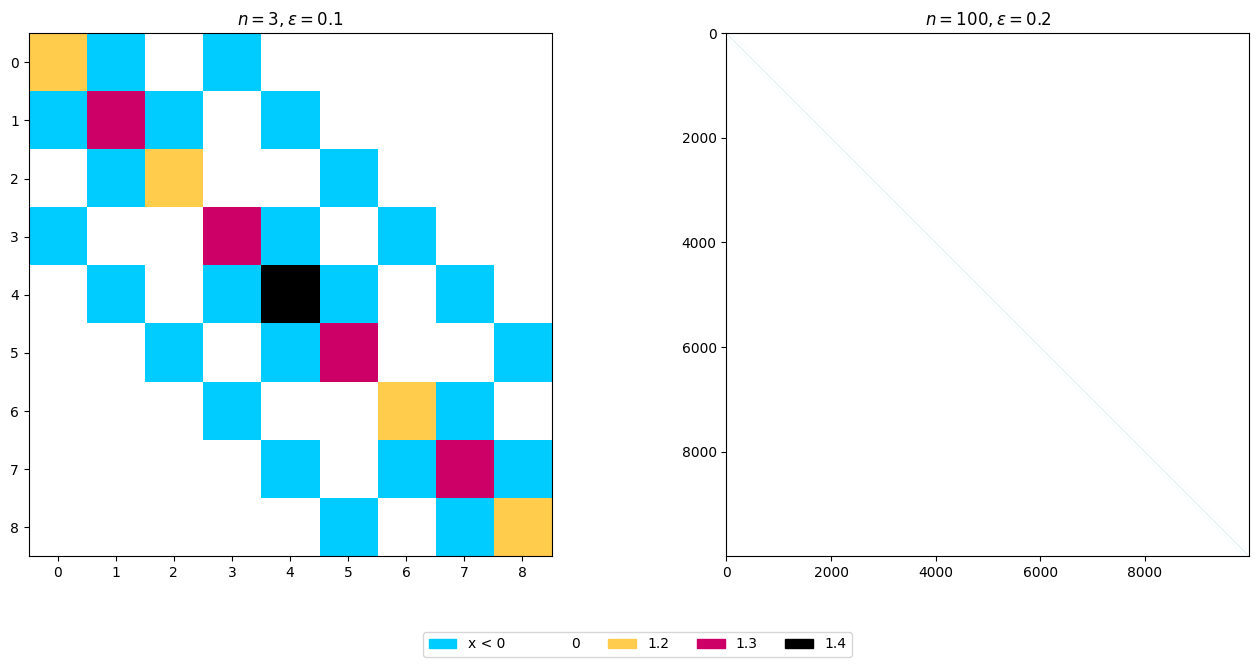

In [1]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


def matrix_location(row: int, column: int, width: int, height: int) -> str:
    if 1 <= row < (height - 1) and 1 <= column < (width - 1):
        return "inside"

    elif (row, column) in [(0, 0), (0, width - 1), (height - 1, 0), (height - 1, width - 1)]:
        return "corner"

    else:
        return "edge"


def get_neighbors(matrix, i, j):
    height, width = matrix.shape
    neighbors = []

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for direction in directions:
        dir_i, dir_j = direction

        neighbor_i = i + dir_i
        neighbor_j = j + dir_j

        if 0 <= neighbor_i < height and 0 <= neighbor_j < width:
            neighbors.append(matrix[neighbor_i, neighbor_j])

    return neighbors


def sparse_matrix_neighbor(n: int, epsilon: float) -> sparse.lil_matrix:
    A = sparse.lil_matrix((n * n, n * n))
    grid_numbers = np.arange(n * n)
    grid_matrix = grid_numbers.reshape((n, n))

    for i in range(n):
        for j in range(n):
            for neighbor in get_neighbors(grid_matrix, i, j):
                A[grid_matrix[i, j], neighbor] = -epsilon

                location = matrix_location(row=i, column=j, width=n, height=n)

                if location == "inside":
                    A[grid_matrix[i, j], grid_matrix[i, j]] = 1 + 4 * epsilon
                elif location == "corner":
                    A[grid_matrix[i, j], grid_matrix[i, j]] = 1 + 2 * epsilon
                elif location == "edge":
                    A[grid_matrix[i, j], grid_matrix[i, j]] = 1 + 3 * epsilon
    return A


def main():
    A_small = sparse_matrix_neighbor(n=3, epsilon=1e-1)
    dense_matrix_small = A_small.todense()
    print(dense_matrix_small)

    A_huge = sparse_matrix_neighbor(n=100, epsilon=2e-1)
    dense_matrix_huge = A_huge.todense()

    colors = [
        (0.0, 0.80, 1.0),
        (1.0, 1.0, 1.0),
        (1.0, 0.8, 0.3),
        (0.8, 0.0, 0.4),
        (0.0, 0.0, 0.0)
    ]
    cmap = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm([-1, 0, 1, 1.25, 1.35, 1.45], cmap.N)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].imshow(dense_matrix_small, cmap=cmap, norm=norm)
    axes[0].set_title(r"$n = 3, \varepsilon = 0.1$")

    axes[1].imshow(dense_matrix_huge, cmap=cmap, norm=norm)
    axes[1].set_title(r"$n = 100, \varepsilon = 0.2$")

    labels = ['x < 0', '0', '1.2', '1.3', '1.4']
    patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors))]
    fig.legend(handles=patches, bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=5)

    plt.tight_layout()
    plt.show()


main()

## Úkol 2. 

Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
- Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
- Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

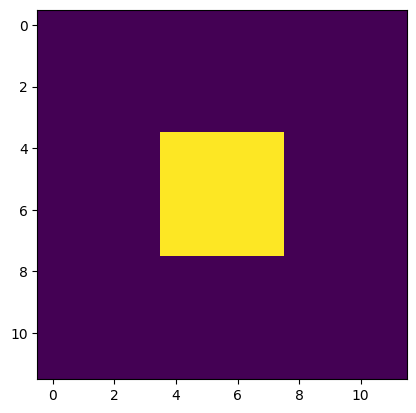

In [5]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = sparse_matrix_neighbor(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))
plt.show()

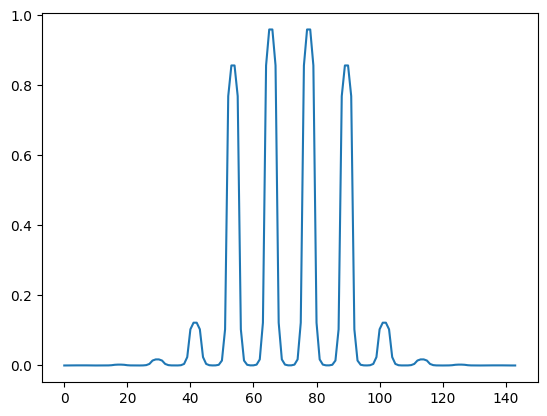

In [10]:
import scipy as sp
import scipy.sparse.linalg as sla

# TODO - vyřešte lineární rovnici A x = b a vykreselete výsledek
A_csr = A.tocsr()

x = sla.spsolve(A_csr, b)
plt.plot(x)
plt.show()

In [ ]:
# TODO - spočtěte a vykreslete vlastní vektory matice A
w, v = sla.eigs(A, k=3)
print("Eigenvalues:")
print(w)
print()
print("Eigenvectors:")
print(v)

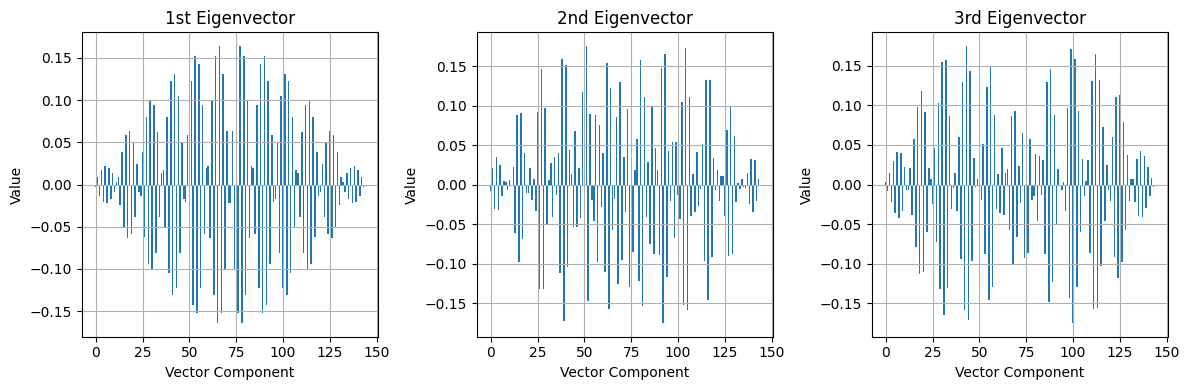

In [16]:
import matplotlib.pyplot as plt

vec1 = v[:, 0].real
vec2 = v[:, 1].real
vec3 = v[:, 2].real

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1) 
plt.bar(range(len(vec1)), vec1)
plt.title("1st Eigenvector")
plt.xlabel("Vector Component")
plt.ylabel("Value")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.bar(range(len(vec2)), vec2)
plt.title("2nd Eigenvector")
plt.xlabel("Vector Component")
plt.ylabel("Value")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.bar(range(len(vec3)), vec3)
plt.title("3rd Eigenvector")
plt.xlabel("Vector Component")
plt.ylabel("Value")
plt.grid(True)

plt.tight_layout()
plt.show()

# Bonusový úkol

**Sestavte matici $A$ z úkolu 1. bez použití cyklů.**
- porovnejte výsledky z úkolu 1 a 2 pro různé hodnoty $n$ a $\varepsilon$.

Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. 

Hint, jak na to: 
- Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
    - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
        - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
        - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
    - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
        - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
- Tyto pole vytvořte vektorizovaně - bez cyklů

In [ ]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix
'''
n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx = # TODO - vytvořte indexy buněk nad hranou
    horizontal_low_idx = # TODO - vytvořte indexy buněk pod hranou
    row_horizontal = # TODO - vytvořte indexy řádků pro vnitřní horizontální hrany
    col_horizontal = # TODO - vytvořte indexy sloupců pro vnitřní horizontální hrany
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná


    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx = # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vlevo od hran
    vertical_right_idx = # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vpravo od hran
    row_vertical = # TODO - vytvořte indexy řádků pro vnitřní vertikální hrany
    col_vertical = # TODO - vytvořte indexy sloupců pro vnitřní vertikální hrany
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    # TODO - odečtěte epsilon pro horní hranu
    # dolní hrana
    # TODO - odečtěte epsilon pro dolní hranu
    # levá hrana
    # TODO - odečtěte epsilon pro levou hranu
    # pravá hrana
    # TODO - odečtěte epsilon pro pravou hranu

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently = # TODO - vytvořte matici v CSR formátu z dat, řádků a sloupců

    return A_efficiently

print(A_efficiently(n, epsilon).todense())
'''